In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



--- Customers DataFrame Preview ---
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

--- Products DataFrame Preview ---
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

--- Transactions DataFrame Preview ---
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067 

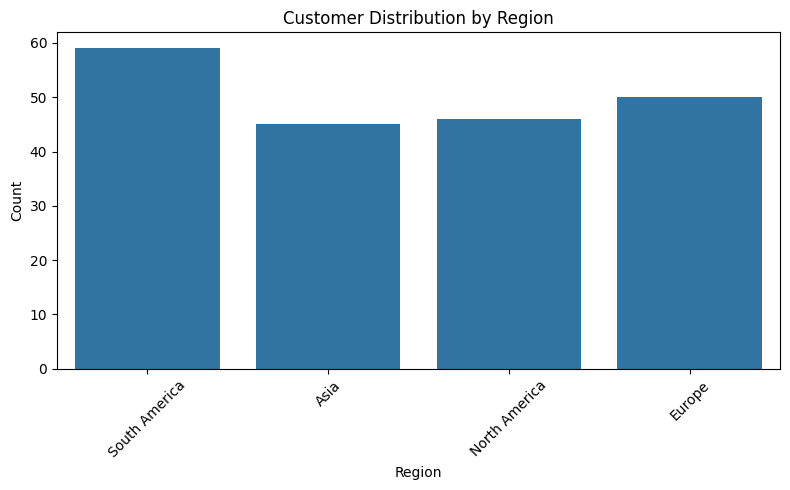

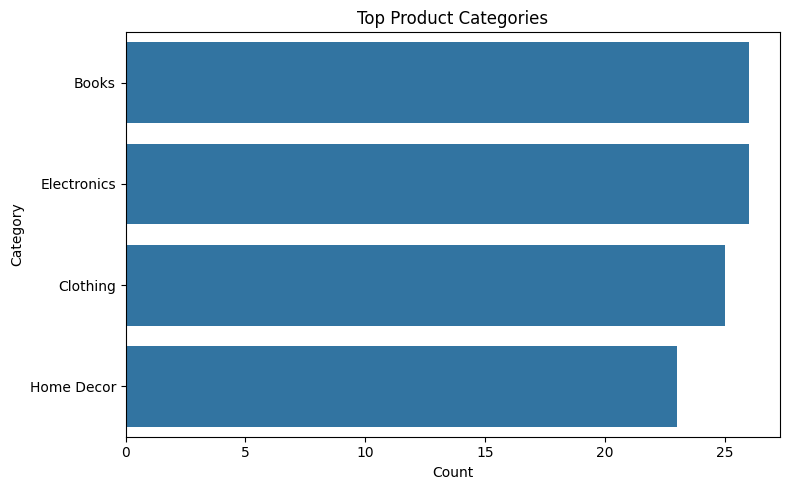

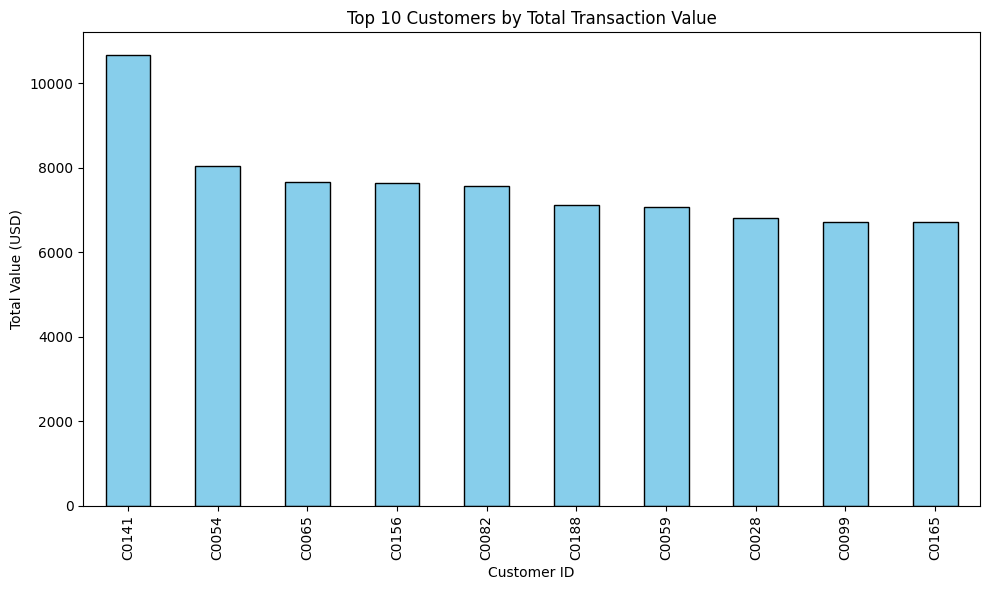

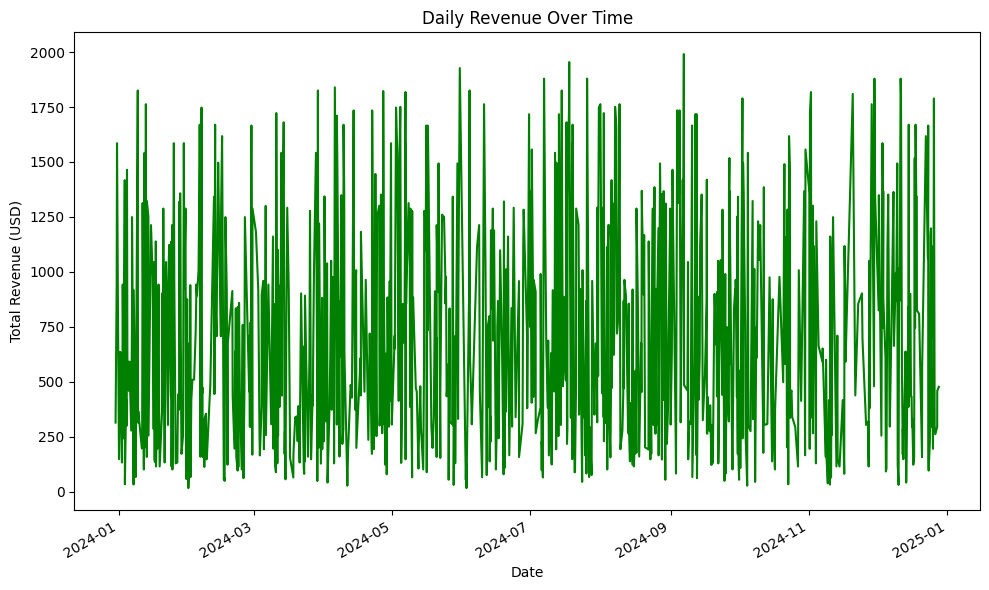


--- Insights ---
1. Customers are concentrated in specific regions, suggesting opportunities for targeted marketing.
2. Some product categories dominate sales, indicating their popularity and revenue potential.
3. The top 10 customers contribute a significant portion of the total revenue.
4. Daily revenue trends suggest potential seasonal effects that require further analysis.
5. Address missing values or anomalies detected during the EDA to improve data quality.


In [2]:
# Task 1: Exploratory Data Analysis (EDA) using folder path

# Step 1: Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Step 2: Defining the folder path
folder_path = "/content/drive/MyDrive/ZeotapIntern"

# Step 3: Loading datasets
customers_df = pd.read_csv(os.path.join(folder_path, 'Customers.csv'))
products_df = pd.read_csv(os.path.join(folder_path, 'Products.csv'))
transactions_df = pd.read_csv(os.path.join(folder_path, 'Transactions.csv'))

# Step 4: Performing Exploratory Data Analysis (EDA)

# Displaying the first few rows of each dataset
print("\n--- Customers DataFrame Preview ---")
print(customers_df.head())

print("\n--- Products DataFrame Preview ---")
print(products_df.head())

print("\n--- Transactions DataFrame Preview ---")
print(transactions_df.head())

# Generating summary statistics for each dataset
print("\n--- Summary Statistics ---")
print("\nCustomers Dataset:")
print(customers_df.describe(include='all'))

print("\nProducts Dataset:")
print(products_df.describe(include='all'))

print("\nTransactions Dataset:")
print(transactions_df.describe(include='all'))

# Checking for missing values in each dataset
print("\n--- Missing Values Check ---")
print("\nCustomers Dataset:")
print(customers_df.isnull().sum())

print("\nProducts Dataset:")
print(products_df.isnull().sum())

print("\nTransactions Dataset:")
print(transactions_df.isnull().sum())

# Step 5: Data Visualization

# 1. Visualizing the distribution of customers by region
plt.figure(figsize=(8, 5))
sns.countplot(x='Region', data=customers_df)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Preventing overlap
plt.show()

# 2. Visualizing top product categories by count
plt.figure(figsize=(8, 5))
sns.countplot(y='Category', data=products_df,
              order=products_df['Category'].value_counts().index)
plt.title('Top Product Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# 3. Identifying top customers by total transaction value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Customers by Total Transaction Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Value (USD)')
plt.tight_layout()
plt.show()

# 4. Analyzing total revenue trends over time
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])  # Ensure datetime format
daily_revenue = transactions_df.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(10, 6))
daily_revenue.plot(color='green')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue (USD)')
plt.tight_layout()
plt.show()

# Step 6: Insights and Observations
print("\n--- Insights ---")
print("1. Customers are concentrated in specific regions, suggesting opportunities for targeted marketing.")
print("2. Some product categories dominate sales, indicating their popularity and revenue potential.")
print("3. The top 10 customers contribute a significant portion of the total revenue.")
print("4. Daily revenue trends suggest potential seasonal effects that require further analysis.")
print("5. Address missing values or anomalies detected during the EDA to improve data quality.")